In [ ]:
from __future__ import print_function
import argparse
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.autograd import Variable

# Baseline

In [ ]:
# Training settings

batch_size = 64

# MNIST Dataset
train_dataset = datasets.MNIST(root='./data/',
                               train=True,
                               transform=transforms.ToTensor(),
                               download=True)

test_dataset = datasets.MNIST(root='./data/',
                              train=False,
                              transform=transforms.ToTensor())

# Data Loader (Input Pipeline)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [ ]:
train_dataset[0][0].size()

torch.Size([1, 28, 28])

In [ ]:
len(train_dataset)

60000

In [ ]:
class Net(nn.Module):
  def __init__(self):
    super(Net, self).__init__()
    self.conv1 = nn.Conv2d(1, 10, kernel_size = 5) 
    self.conv2 = nn.Conv2d(10, 20, kernel_size = 5) 
    self.mp = nn.MaxPool2d(2)
    self.fc = nn.Linear(320, 10) ### : 알맞는 input은? 20*4*4

  def forward(self, x):
    in_size = x.size(0)
    x = F.relu(self.mp(self.conv1(x))) #(10, 12, 12)
    x = F.relu(self.mp(self.conv2(x))) #(20, 4, 4)
    x = x.view(in_size, -1)
    x = self.fc(x)
    return F.log_softmax(x)

In [ ]:
model = Net()
optimizer = optim.SGD(model.parameters(), lr = 0.01, momentum = 0.5)

In [ ]:
def train(epoch):
  model.train()
  for batch_idx, (data, target) in enumerate(train_loader):
    data, target = Variable(data), Variable(target)
    optimizer.zero_grad()
    output = model(data)
    loss = F.nll_loss(output, target)
    loss.backward()
    optimizer.step()
    if batch_idx % 10 == 0:
      print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
          epoch, batch_idx * len(data), len(train_loader.dataset),
          100. * batch_idx / len(train_loader), loss.item()))

In [ ]:
def test():
    model.eval()
    test_loss = 0
    correct = 0
    for data, target in test_loader:
        data, target = Variable(data, volatile=True), Variable(target)
        output = model(data)
        test_loss += F.nll_loss(output, target, size_average=False).data # nll_loss?? / cross entropy loss와의 관계 확인!
        pred = output.data.max(1, keepdim=True)[1]
        correct += pred.eq(target.data.view_as(pred)).cpu().sum()

    test_loss /= len(test_loader.dataset)
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))

In [ ]:
for epoch in range(1, 10):
    train(epoch)
    test()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  from ipykernel import kernelapp as app


Train Epoch: 1 [0/60000 (0%)]	Loss: 2.297915
Train Epoch: 1 [640/60000 (1%)]	Loss: 2.296782
Train Epoch: 1 [1280/60000 (2%)]	Loss: 2.266119
Train Epoch: 1 [1920/60000 (3%)]	Loss: 2.238128
Train Epoch: 1 [2560/60000 (4%)]	Loss: 2.229250
Train Epoch: 1 [3200/60000 (5%)]	Loss: 2.176033
Train Epoch: 1 [3840/60000 (6%)]	Loss: 2.083524
Train Epoch: 1 [4480/60000 (7%)]	Loss: 2.044327
Train Epoch: 1 [5120/60000 (9%)]	Loss: 1.906599
Train Epoch: 1 [5760/60000 (10%)]	Loss: 1.745515
Train Epoch: 1 [6400/60000 (11%)]	Loss: 1.507322
Train Epoch: 1 [7040/60000 (12%)]	Loss: 1.287001
Train Epoch: 1 [7680/60000 (13%)]	Loss: 0.965338
Train Epoch: 1 [8320/60000 (14%)]	Loss: 1.108076
Train Epoch: 1 [8960/60000 (15%)]	Loss: 0.698722
Train Epoch: 1 [9600/60000 (16%)]	Loss: 0.737873
Train Epoch: 1 [10240/60000 (17%)]	Loss: 0.771873
Train Epoch: 1 [10880/60000 (18%)]	Loss: 0.739661
Train Epoch: 1 [11520/60000 (19%)]	Loss: 0.669261
Train Epoch: 1 [12160/60000 (20%)]	Loss: 0.537639
Train Epoch: 1 [12800/60000 (

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  
/usr/local/lib/python3.7/dist-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))



Test set: Average loss: 0.2068, Accuracy: 9385/10000 (94%)

Train Epoch: 2 [0/60000 (0%)]	Loss: 0.185650
Train Epoch: 2 [640/60000 (1%)]	Loss: 0.285877
Train Epoch: 2 [1280/60000 (2%)]	Loss: 0.144296
Train Epoch: 2 [1920/60000 (3%)]	Loss: 0.106021
Train Epoch: 2 [2560/60000 (4%)]	Loss: 0.154928
Train Epoch: 2 [3200/60000 (5%)]	Loss: 0.272141
Train Epoch: 2 [3840/60000 (6%)]	Loss: 0.144911
Train Epoch: 2 [4480/60000 (7%)]	Loss: 0.227158
Train Epoch: 2 [5120/60000 (9%)]	Loss: 0.169346
Train Epoch: 2 [5760/60000 (10%)]	Loss: 0.156976
Train Epoch: 2 [6400/60000 (11%)]	Loss: 0.171463
Train Epoch: 2 [7040/60000 (12%)]	Loss: 0.153513
Train Epoch: 2 [7680/60000 (13%)]	Loss: 0.362593
Train Epoch: 2 [8320/60000 (14%)]	Loss: 0.168008
Train Epoch: 2 [8960/60000 (15%)]	Loss: 0.123777
Train Epoch: 2 [9600/60000 (16%)]	Loss: 0.265527
Train Epoch: 2 [10240/60000 (17%)]	Loss: 0.416547
Train Epoch: 2 [10880/60000 (18%)]	Loss: 0.235820
Train Epoch: 2 [11520/60000 (19%)]	Loss: 0.236185
Train Epoch: 2 [12

## Task 1 : 
위 베이스라인 구조를 아래와 같은 형태로 변경 + MNIST 데이터셋 (위 베이스라인에서 사용한 데이터셋)

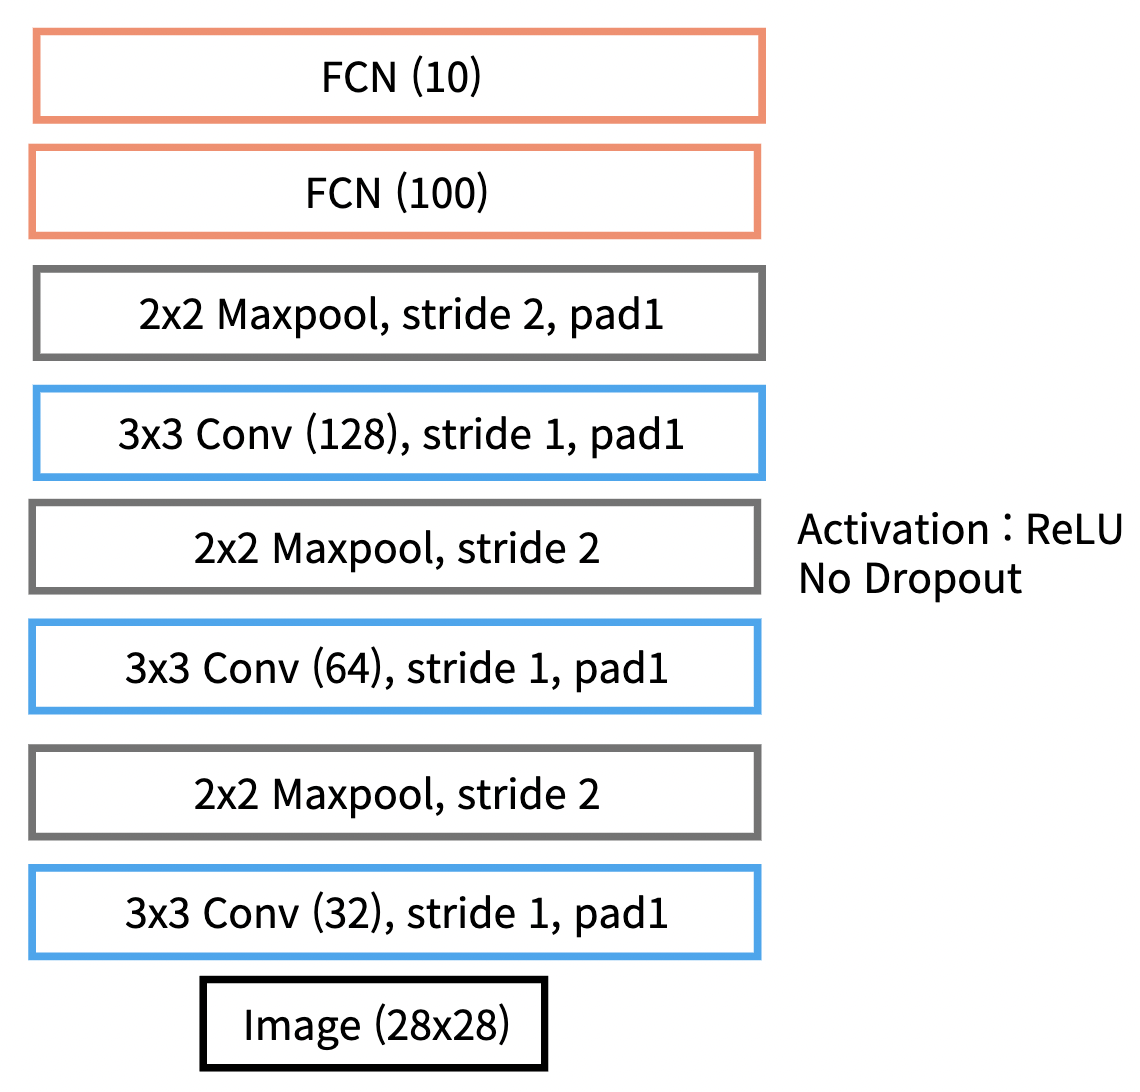

In [ ]:
class revised_Net(nn.Module):
  def __init__(self):
    super(revised_Net, self).__init__()
    self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1) #size유지
    self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
    self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
    self.maxpool1 = nn.MaxPool2d(2, stride=2)
    self.maxpool2 = nn.MaxPool2d(2, stride=2, padding=1)
    self.fc1 = nn.Linear(128*4*4, 100)
    self.fc2 = nn.Linear(100, 10)

  def forward(self, x):
    in_size = x.size(0)
    x = F.relu(self.maxpool1(self.conv1(x))) #(32, 14, 14)
    x = F.relu(self.maxpool1(self.conv2(x))) #(64, 7, 7)
    x = F.relu(self.maxpool2(self.conv3(x))) #(128, 4, 4)
    x = x.view(in_size, -1) 
    x = F.relu(self.fc1(x))
    x = self.fc2(x)
    
    return F.log_softmax(x)

In [ ]:
model = revised_Net()
optimizer = optim.SGD(model.parameters(), lr = 0.01, momentum = 0.5)

def train(epoch):
  model.train()
  for batch_idx, (data, target) in enumerate(train_loader):
    data, target = Variable(data), Variable(target)
    optimizer.zero_grad()
    output = model(data)
    loss = F.nll_loss(output, target)
    loss.backward()
    optimizer.step()
    if batch_idx % 10 == 0:
      print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
          epoch, batch_idx * len(data), len(train_loader.dataset),
          100. * batch_idx / len(train_loader), loss.item()))
      
def test():
    model.eval()
    test_loss = 0
    correct = 0
    for data, target in test_loader:
        data, target = Variable(data, volatile=True), Variable(target)
        output = model(data)
        test_loss += F.nll_loss(output, target, size_average=False).data # nll_loss?? / cross entropy loss와의 관계 확인!
        pred = output.data.max(1, keepdim=True)[1]
        correct += pred.eq(target.data.view_as(pred)).cpu().sum()

    test_loss /= len(test_loader.dataset)
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))

In [ ]:
for epoch in range(1, 10):
    train(epoch)
    test()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Train Epoch: 1 [0/60000 (0%)]	Loss: 2.307696
Train Epoch: 1 [640/60000 (1%)]	Loss: 2.305496
Train Epoch: 1 [1280/60000 (2%)]	Loss: 2.309937
Train Epoch: 1 [1920/60000 (3%)]	Loss: 2.300430
Train Epoch: 1 [2560/60000 (4%)]	Loss: 2.302866
Train Epoch: 1 [3200/60000 (5%)]	Loss: 2.300642
Train Epoch: 1 [3840/60000 (6%)]	Loss: 2.294338
Train Epoch: 1 [4480/60000 (7%)]	Loss: 2.301520
Train Epoch: 1 [5120/60000 (9%)]	Loss: 2.298154
Train Epoch: 1 [5760/60000 (10%)]	Loss: 2.288108
Train Epoch: 1 [6400/60000 (11%)]	Loss: 2.301294
Train Epoch: 1 [7040/60000 (12%)]	Loss: 2.290286
Train Epoch: 1 [7680/60000 (13%)]	Loss: 2.280790
Train Epoch: 1 [8320/60000 (14%)]	Loss: 2.280756
Train Epoch: 1 [8960/60000 (15%)]	Loss: 2.279246
Train Epoch: 1 [9600/60000 (16%)]	Loss: 2.278439
Train Epoch: 1 [10240/60000 (17%)]	Loss: 2.281192
Train Epoch: 1 [10880/60000 (18%)]	Loss: 2.269824
Train Epoch: 1 [11520/60000 (19%)]	Loss: 2.274575
Train Epoch: 1 [12160/60000 (20%)]	Loss: 2.256665
Train Epoch: 1 [12800/60000 (

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
/usr/local/lib/python3.7/dist-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))



Test set: Average loss: 0.4471, Accuracy: 8478/10000 (85%)

Train Epoch: 2 [0/60000 (0%)]	Loss: 0.627480
Train Epoch: 2 [640/60000 (1%)]	Loss: 0.176295
Train Epoch: 2 [1280/60000 (2%)]	Loss: 0.272514
Train Epoch: 2 [1920/60000 (3%)]	Loss: 0.273326
Train Epoch: 2 [2560/60000 (4%)]	Loss: 0.242439
Train Epoch: 2 [3200/60000 (5%)]	Loss: 0.341909
Train Epoch: 2 [3840/60000 (6%)]	Loss: 0.282081
Train Epoch: 2 [4480/60000 (7%)]	Loss: 0.212296
Train Epoch: 2 [5120/60000 (9%)]	Loss: 0.111448
Train Epoch: 2 [5760/60000 (10%)]	Loss: 0.272675
Train Epoch: 2 [6400/60000 (11%)]	Loss: 0.270673
Train Epoch: 2 [7040/60000 (12%)]	Loss: 0.160712
Train Epoch: 2 [7680/60000 (13%)]	Loss: 0.289604
Train Epoch: 2 [8320/60000 (14%)]	Loss: 0.179641
Train Epoch: 2 [8960/60000 (15%)]	Loss: 0.295153
Train Epoch: 2 [9600/60000 (16%)]	Loss: 0.235449
Train Epoch: 2 [10240/60000 (17%)]	Loss: 0.322502
Train Epoch: 2 [10880/60000 (18%)]	Loss: 0.341710
Train Epoch: 2 [11520/60000 (19%)]	Loss: 0.229230
Train Epoch: 2 [12

# Task 2 : 
베이스라인 마음대로 변경 + Softmax regression 과제에서  사용했던 데이터셋 (변경 가능하나 같은 데이터셋으로 진행하시는 걸 추천드립니다!) >> CNN으로 성공해보자!

* 지난번 과제와 마찬가지로 다양한 방식을 시도해보시고 그 시도 기록을 남겨주세요. 가장 성능이 좋았던 모델도 표시 부탁드립니다!

* 이번엔 GPU resource 문제가 생길 수 있습니다. 파라미터 조정, dropout 추가 등 연산 효율성도 고려해서 베이스라인 조정해보세요!

*The Food-101 Data Set\
https://data.vision.ee.ethz.ch/cvl/datasets_extra/food-101/ \
We introduce a challenging data set of 101 food categories, with 101'000 images.\
For each class, 250 manually reviewed test images are provided as well as 750 training images.\
 On purpose, the training images were not cleaned, and thus still contain some amount of noise. This comes mostly in the form of intense colors and sometimes wrong labels.\
All images were rescaled to have a maximum side length of 512 pixels.

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

torch.manual_seed(777)
if device == "cuda":
  torch.cuda.manual_seed_all(777)


# 1. 데이터 불러오기

In [ ]:
import torch
from torch import nn, optim
import torchvision.transforms as transforms
from sklearn.datasets import load_breast_cancer
from torch.utils.data import  TensorDataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [ ]:
#데이터 다운로드
#food = torchvision.datasets.Food101(
#    root='/content/drive/MyDrive/쿠빅/딥러닝 방학세션',  # 데이터 저장 위치
#    download=True,     # 다운로드 여부, (이미 다운받았으면 False로 지정)
#    transform=transforms  # 데이터 선처리 작업
#)

## 1.1 101가지는 너무 많아서 내가 좋아하는 15종류의 음식만 가져옴

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
food_list = ['pizza','chicken_wings','cheesecake']
#,'carrot_cake','chocolate_cake','french_fries','greek_salad','hamburger','hot_dog','ice_cream']
#,'pizza','ramen','tacos','waffles','sashimi']

In [ ]:
import os
dir = '/content/drive/MyDrive/쿠빅/딥러닝 방학세션/food-101/images/'
dirs =[]
for i in food_list:
  dirs.append(os.path.join(dir,i))

In [ ]:
food_fnames=[]
for j in dirs:
  food_fnames.append(os.listdir(j))

## 1.2 이미지 시각화

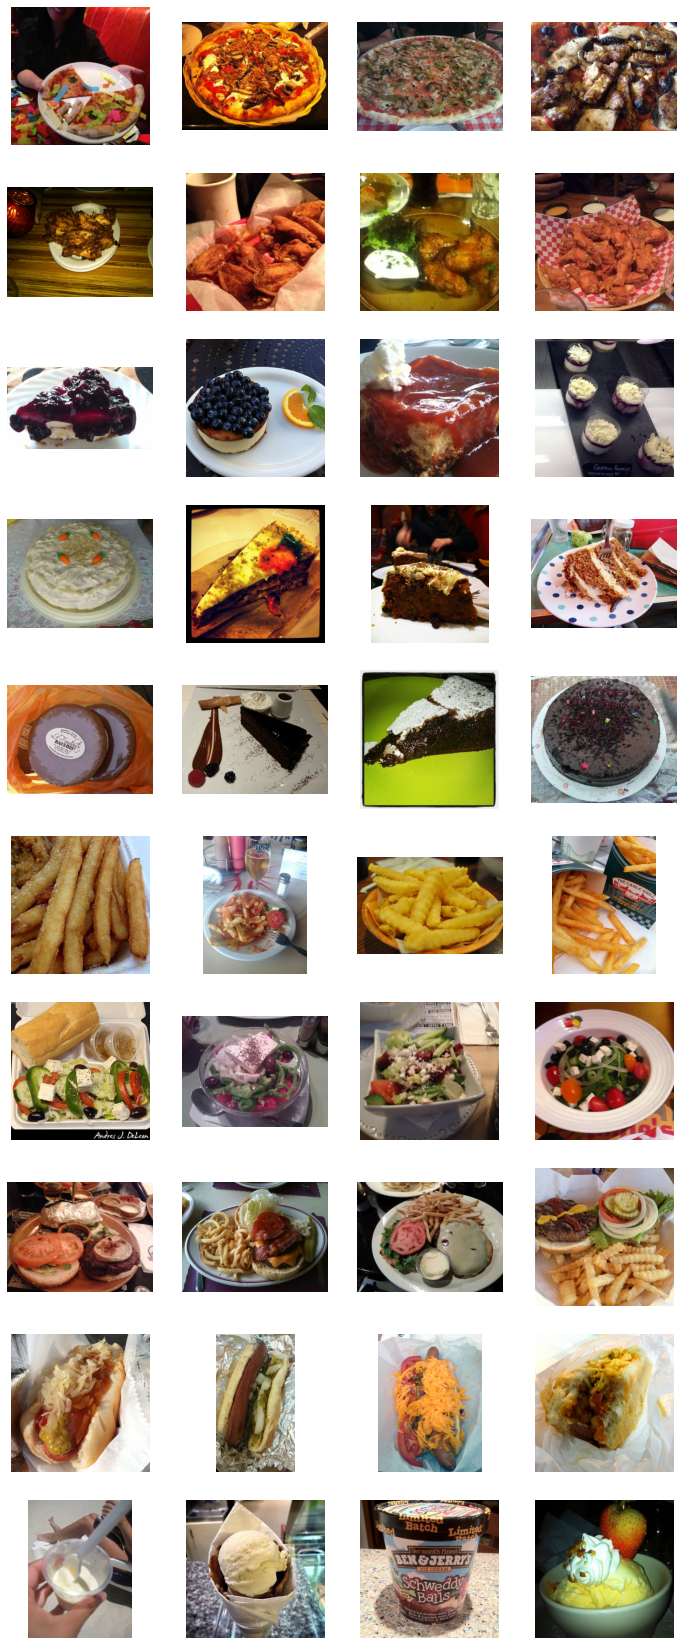

In [ ]:
%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

nrows, ncols = 10, 4
pic_index = 0

fig = plt.gcf()
fig.set_size_inches(ncols*3, nrows*3)

pictures = []
for i in range(10):
  pictures += [os.path.join(dirs[i], fname) for fname in food_fnames[i][0:4]]

for i, img_path in enumerate(pictures):
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off')

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

## 1.3 데이터 전처리

(1) 각 이미지에 대한 class label 할당

파일이름, label, 파일경로 dataframe 생성

In [ ]:
import pandas as pd

label_df = pd.DataFrame()

pictures =[]
for i in range(3):
  pictures += [os.path.join(dirs[i], fname) for fname in food_fnames[i]]


In [ ]:
len(pictures)

3000

In [ ]:
#파일이름
names=[]

for i in range(len(food_fnames)):
  for j in range(1000):
    names.append(food_fnames[i][j])

In [ ]:
label_df['file_name'] = names

label_df['label'] = ['pizza']*1000 + ['chicken_wings']*1000 + ['cheesecake']*1000 
#+ ['carrot_cake']*1000 + ['chocolate_cake']*1000 + ['french_fries']*1000 + ['greek_salad']*1000 + ['hamburger']*1000 + ['hot_dog']*1000 + ['ice_cream']*1000 

#+ ['pizza']*1000 + ['ramen']*1000 + ['tacos']*1000 + ['waffles']*1000 + ['sashimi']*1000

label_df['directory'] = pictures

In [ ]:
label_df

,file_name,label,directory
0,3393898.jpg,pizza,/content/drive/MyDrive/쿠빅/딥러닝 방학세...
1,340814.jpg,pizza,/content/drive/MyDrive/쿠빅/딥러닝 방학세...
2,951953.jpg,pizza,/content/drive/MyDrive/쿠빅/딥러닝 방학세...
3,2671508.jpg,pizza,/content/drive/MyDrive/쿠빅/딥러닝 방학세...
4,3164761.jpg,pizza,/content/drive/MyDrive/쿠빅/딥러닝 방학세...
...,...,...,...
2995,2956877.jpg,cheesecake,/content/drive/MyDrive/쿠빅/딥러닝 방학세...
2996,1096018.jpg,cheesecake,/content/drive/MyDrive/쿠빅/딥러닝 방학세...
2997,280586.jpg,cheesecake,/content/drive/MyDrive/쿠빅/딥러닝 방학세...
2998,3837391.jpg,cheesecake,/content/drive/MyDrive/쿠빅/딥러닝 방학세...


(2) 이미지 불러오기

Error: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  ../torch/csrc/utils/tensor_new.cpp:201.) -> np.array 해줌

list로 가져오니까 너무 오래걸렸음 -> array 형태로 가져오니까 연산속도가 훨씬 빨라짐

In [ ]:
import numpy as np

number_of_data = 3000  # 데이터 수
img_size = 64  # 이미지의 사이즈 (정사각형으로 간주)
color = 3  # 컬러는 3, 흑백은 1
batch_size = 32  # 배치사이즈

# 덧셈의 형태로 만들기

x = np.zeros((number_of_data,)  + (color,)+ (img_size, img_size) , dtype="float32")

# [출처]https://biology-statistics-programming.tistory.com/112

In [36]:
from skimage.transform import resize
import matplotlib.pyplot as plt

j = 0
for i in list(label_df['directory'][:3000]):
  img = plt.imread(i)
  img_resize = resize(img, (3, 64, 64))
  x[j, :, :, :] = img_resize
  j += 1


In [ ]:
type(x)

numpy.ndarray

In [37]:
np.save('/content/drive/MyDrive/쿠빅/딥러닝 방학세션/x', x) 
#-> 데이터 로드 너무 오래 걸려서 저장함

In [38]:
df = label_df.iloc[:3000]

(3) train set과 test set spilt 해주기

In [39]:
# y값 labeling
for i in range(3):
  df.loc[df['label'] == food_list[i], 'label'] = i

In [40]:
df['label']=pd.to_numeric(df['label'])

In [41]:
from sklearn.model_selection import train_test_split
import numpy as np

x_train, x_test, y_train, y_test = train_test_split(x[:3000], np.array(df['label']), test_size=0.2, random_state=42)    

(3) 이미지 Tensor로 바꿔주기

In [42]:
# to(device): GPU로 전송
x_train = torch.FloatTensor(x_train).to(device) #FloatTensor: 32비트 부동소수점 (Tensor의 default)
y_train = torch.LongTensor(y_train).to(device) #LongTensor: 64비트 정수(부호있음)
x_test = torch.FloatTensor(x_test)
y_test = torch.LongTensor(y_test)

In [84]:
x_train.size()

torch.Size([2400, 3, 64, 64])

In [44]:
y_train.size()

torch.Size([2400])

(4) 전체 데이터셋 구성

사용자 정의 데이터셋

In [45]:
from torch.utils.data import Dataset

class CustomDataset(Dataset):
  def __init__(self):
    self.x_data = x_train
    self.y_data = [[y] for y in y_train]


#  데이터셋의 전처리를 해주는 부분

  def __len__(self):
    return len(self.x_data)
#  데이터셋의 길이. 즉, 총 샘플의 수를 적어주는 부분

  def __getitem__(self, idx):
    x = torch.FloatTensor(self.x_data[idx]).to(device)
    y = torch.LongTensor(self.y_data[idx]).to(device)
#  데이터셋에서 특정 1개의 샘플을 가져오는 함수

    return x,y

DataLoader

In [46]:
dataset = CustomDataset()
dataloader = DataLoader(dataset, batch_size=30, shuffle=True)

# 2. 모델 구현

RuntimeError: CUDA out of memory. Tried to allocate 2.20 GiB (GPU 0; 14.76 GiB total capacity; 11.29 GiB already allocated; 1.65 GiB free; 12.00 GiB reserved in total by PyTorch) If reserved memory is >> allocated memory try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF\
* 위 에러에 대한 해결책 시도들\
image사이즈 작게 => 해결됨
잘못된 에러 메시지 보고 (실제로 메모리가 부족한 케이스)\
nn.Sequential 제거\
배치 사이즈 줄이기\
with torch.no_grad() 추가\
GPU를 점유하고 있는 다른 프로세스 제거\
Optimizer 변경 (Adam → SGD)\
torch.cuda.empty_cache()로 캐시 삭제\
gc.collect()로 가비지 컬렉터 수동 실행\
(메모리를 점유하고 있는) 다른 변수 확인 & 제거\
(Jupyter Notebook의 경우) 커널 재시작\

캐시 삭제

In [ ]:
import torch, gc
gc.collect()
torch.cuda.empty_cache()

## 2.1 CNN

In [68]:
class CNN(torch.nn.Module):
  def __init__(self):
    super(CNN, self).__init__()
    self.layer = nn.Sequential(
        nn.Conv2d(3,16,5),
        nn.Dropout(0.2),
        nn.ReLU(),
        nn.Conv2d(16, 8, 5),
        nn.Dropout(0.2),
        nn.ReLU(),
        nn.MaxPool2d(2,stride=2),
        nn.Conv2d(8, 3, 5),
        nn.Dropout(0.2),
        nn.ReLU(),
        nn.MaxPool2d(2,stride=2)
    )
    self.fc_layer = nn.Sequential(
        nn.Flatten(),
        nn.Linear(432, 50),
        nn.ReLU(),
        nn.Linear(50,3)
    )

  def forward(self,x):
    out = self.layer(x)
    out = self.fc_layer(out)
    return out

In [69]:
def init_weights(layer):
    if isinstance(layer, nn.Linear):
        torch.nn.init.xavier_uniform(layer.weight)
        layer.bias.data.fill_(0.01)

In [70]:
model = CNN().to(device)
model.apply(init_weights)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: nn.init.xavier_uniform is now deprecated in favor of nn.init.xavier_uniform_.
  This is separate from the ipykernel package so we can avoid doing imports until


CNN(
  (layer): Sequential(
    (0): Conv2d(3, 16, kernel_size=(5, 5), stride=(1, 1))
    (1): Dropout(p=0.2, inplace=False)
    (2): ReLU()
    (3): Conv2d(16, 8, kernel_size=(5, 5), stride=(1, 1))
    (4): Dropout(p=0.2, inplace=False)
    (5): ReLU()
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(8, 3, kernel_size=(5, 5), stride=(1, 1))
    (8): Dropout(p=0.2, inplace=False)
    (9): ReLU()
    (10): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc_layer): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=432, out_features=50, bias=True)
    (2): ReLU()
    (3): Linear(in_features=50, out_features=3, bias=True)
  )
)

In [71]:
loss_fn  = nn.CrossEntropyLoss().to(device)

optimizer = optim.Adam(model.parameters(), lr= 0.01)

In [73]:
from tqdm import tqdm
losses = []
epoch = 100
for i in tqdm(range(epoch)):

    optimizer.zero_grad()
    hypothesis = model(x_train)

    # 비용 함수
    cost = loss_fn(hypothesis, y_train)
    cost.backward()
    optimizer.step()
    losses.append(cost.item())

    if i%10 == 0:
        print(i, cost.item())

  2%|▏         | 2/100 [00:00<00:20,  4.71it/s]

0 1.0988800525665283


 12%|█▏        | 12/100 [00:02<00:15,  5.71it/s]

10 1.0986531972885132


 22%|██▏       | 22/100 [00:03<00:13,  5.74it/s]

20 1.098488211631775


 32%|███▏      | 32/100 [00:05<00:11,  5.75it/s]

30 1.0985138416290283


 42%|████▏     | 42/100 [00:07<00:10,  5.71it/s]

40 1.0984832048416138


 52%|█████▏    | 52/100 [00:09<00:08,  5.71it/s]

50 1.0984872579574585


 62%|██████▏   | 62/100 [00:10<00:06,  5.69it/s]

60 1.0984843969345093


 72%|███████▏  | 72/100 [00:12<00:04,  5.68it/s]

70 1.0984830856323242


 82%|████████▏ | 82/100 [00:14<00:03,  5.68it/s]

80 1.098483681678772


 92%|█████████▏| 92/100 [00:16<00:01,  5.65it/s]

90 1.0984833240509033


100%|██████████| 100/100 [00:17<00:00,  5.66it/s]


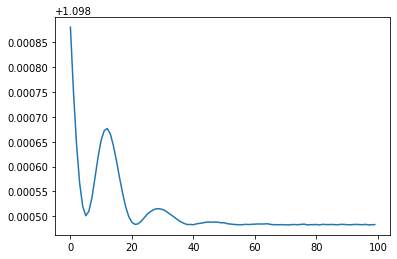

In [74]:
plt.plot(losses)
plt.show()

test accuracy

In [75]:
with torch.no_grad():
  model = model.to('cpu')
  y_pred = model(x_test)
  y_pred = y_pred.detach().numpy()
  predicted = np.argmax(y_pred, axis =1)
  accuracy = (accuracy_score(predicted, y_test))
  
  print(f'model의 output은 :  {y_pred[0]}')
print(f'argmax를 한 후의 output은 {predicted[0]}')
print(f'accuracy는 {accuracy}')

model의 output은 :  [0.02264983 0.04789085 0.06150098]
argmax를 한 후의 output은 2
accuracy는 0.31


## 2.1.2 CNN + padding

In [130]:
class CNN(torch.nn.Module):
  def __init__(self):
    super(CNN, self).__init__()
    self.layer = nn.Sequential(
        nn.Conv2d(3,16,5, padding=1),
        nn.Dropout(0.2),
        nn.ReLU(),
        nn.Conv2d(16, 8, 5, padding=1),
        nn.Dropout(0.2),
        nn.ReLU(),
        nn.MaxPool2d(2,stride=2),
        nn.Conv2d(8, 3, 5, padding=1),
        nn.Dropout(0.2),
        nn.ReLU(),
        nn.MaxPool2d(2,stride=1)
    )
    self.fc_layer = nn.Sequential(
        nn.Flatten(),
        nn.Linear(2187, 50),
        nn.ReLU(),
        nn.Linear(50,3)
    )

  def forward(self,x):
    out = self.layer(x)
    out = self.fc_layer(out)
    return out

In [131]:
model = CNN().to(device)
model.apply(init_weights)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: nn.init.xavier_uniform is now deprecated in favor of nn.init.xavier_uniform_.
  This is separate from the ipykernel package so we can avoid doing imports until


CNN(
  (layer): Sequential(
    (0): Conv2d(3, 16, kernel_size=(5, 5), stride=(1, 1), padding=(1, 1))
    (1): Dropout(p=0.2, inplace=False)
    (2): ReLU()
    (3): Conv2d(16, 8, kernel_size=(5, 5), stride=(1, 1), padding=(1, 1))
    (4): Dropout(p=0.2, inplace=False)
    (5): ReLU()
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(8, 3, kernel_size=(5, 5), stride=(1, 1), padding=(1, 1))
    (8): Dropout(p=0.2, inplace=False)
    (9): ReLU()
    (10): MaxPool2d(kernel_size=2, stride=1, padding=0, dilation=1, ceil_mode=False)
  )
  (fc_layer): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=2187, out_features=50, bias=True)
    (2): ReLU()
    (3): Linear(in_features=50, out_features=3, bias=True)
  )
)

In [132]:
loss_fn  = nn.CrossEntropyLoss().to(device)

optimizer = optim.Adam(model.parameters(), lr= 0.01)

In [133]:
from tqdm import tqdm
losses = []
epoch = 100
for i in tqdm(range(epoch)):

    optimizer.zero_grad()
    hypothesis = model(x_train)

    # 비용 함수
    cost = loss_fn(hypothesis, y_train)
    cost.backward()
    optimizer.step()
    losses.append(cost.item())

    if i%10 == 0:
        print(i, cost.item())

  2%|▏         | 2/100 [00:00<00:22,  4.32it/s]

0 1.1423933506011963


 12%|█▏        | 12/100 [00:02<00:17,  5.17it/s]

10 1.0986145734786987


 22%|██▏       | 22/100 [00:04<00:15,  5.15it/s]

20 1.0985875129699707


 32%|███▏      | 32/100 [00:06<00:13,  5.14it/s]

30 1.0985318422317505


 42%|████▏     | 42/100 [00:08<00:11,  5.10it/s]

40 1.0984965562820435


 52%|█████▏    | 52/100 [00:10<00:09,  5.09it/s]

50 1.0984864234924316


 62%|██████▏   | 62/100 [00:12<00:07,  5.11it/s]

60 1.0984840393066406


 72%|███████▏  | 72/100 [00:14<00:05,  5.09it/s]

70 1.0984840393066406


 82%|████████▏ | 82/100 [00:16<00:03,  5.06it/s]

80 1.0984840393066406


 92%|█████████▏| 92/100 [00:18<00:01,  5.08it/s]

90 1.098483681678772


100%|██████████| 100/100 [00:19<00:00,  5.09it/s]


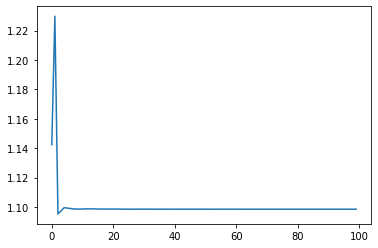

In [134]:
plt.plot(losses)
plt.show()

In [135]:
with torch.no_grad():
  model = model.to('cpu')
  y_pred = model(x_test)
  y_pred = y_pred.detach().numpy()
  predicted = np.argmax(y_pred, axis =1)
  accuracy = (accuracy_score(predicted, y_test))
  
  print(f'model의 output은 :  {y_pred[0]}')
print(f'argmax를 한 후의 output은 {predicted[0]}')
print(f'accuracy는 {accuracy}')

model의 output은 :  [-0.03359375 -0.00859878  0.0048703 ]
argmax를 한 후의 output은 2
accuracy는 0.31


# 2.2 revised_Net

In [95]:
class revised_Net(nn.Module):
  def __init__(self):
    super(revised_Net, self).__init__()
    self.conv1 = nn.Conv2d(3, 16, kernel_size=5, padding=1) 
    self.conv2 = nn.Conv2d(16, 8, kernel_size=5, padding=1)
    self.conv3 = nn.Conv2d(8, 3, kernel_size=5, padding=1)
    self.maxpool1 = nn.MaxPool2d(2, stride=2, padding=1)
    self.maxpool2 = nn.MaxPool2d(2, stride=2)
    self.dp = nn.Dropout(0.2)
    self.fc_layer = nn.Sequential(
        nn.Flatten(),
        nn.Linear(75, 100),
        nn.ReLU(),
        nn.Linear(100,5)
    )
  def forward(self, x):
    x = F.relu(self.dp(self.conv1(self.maxpool1(x))))
    x = F.relu(self.dp(self.conv2(self.maxpool2(x))))
    x = F.relu(self.dp(self.conv3(self.maxpool1(x))))
    x = self.fc_layer(x)
    return F.log_softmax(x)

In [96]:
model = revised_Net().to(device)
model.apply(init_weights)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: nn.init.xavier_uniform is now deprecated in favor of nn.init.xavier_uniform_.
  This is separate from the ipykernel package so we can avoid doing imports until


revised_Net(
  (conv1): Conv2d(3, 16, kernel_size=(5, 5), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(16, 8, kernel_size=(5, 5), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(8, 3, kernel_size=(5, 5), stride=(1, 1), padding=(1, 1))
  (maxpool1): MaxPool2d(kernel_size=2, stride=2, padding=1, dilation=1, ceil_mode=False)
  (maxpool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (dp): Dropout(p=0.2, inplace=False)
  (fc_layer): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=75, out_features=100, bias=True)
    (2): ReLU()
    (3): Linear(in_features=100, out_features=5, bias=True)
  )
)

In [97]:
loss_fn  = nn.CrossEntropyLoss().to(device)

optimizer = optim.Adam(model.parameters(), lr= 0.01)

In [98]:
from tqdm import tqdm
losses = []
epoch = 100
for i in tqdm(range(epoch)):

    optimizer.zero_grad()
    hypothesis = model(x_train)

    # 비용 함수
    cost = loss_fn(hypothesis, y_train)
    cost.backward()
    optimizer.step()
    losses.append(cost.item())

    if i%10 == 0:
        print(i, cost.item())

  4%|▍         | 4/100 [00:00<00:05, 17.73it/s]

0 1.6102591753005981


 16%|█▌        | 16/100 [00:00<00:03, 25.75it/s]

10 1.0998426675796509


 25%|██▌       | 25/100 [00:01<00:02, 26.71it/s]

20 1.076082468032837


 34%|███▍      | 34/100 [00:01<00:02, 26.60it/s]

30 1.0103461742401123


 46%|████▌     | 46/100 [00:01<00:01, 27.01it/s]

40 0.9944947361946106


 55%|█████▌    | 55/100 [00:02<00:01, 26.94it/s]

50 0.9655142426490784


 64%|██████▍   | 64/100 [00:02<00:01, 26.63it/s]

60 0.9447470307350159


 76%|███████▌  | 76/100 [00:02<00:00, 26.83it/s]

70 0.9307959079742432


 85%|████████▌ | 85/100 [00:03<00:00, 26.86it/s]

80 0.9172431230545044


 94%|█████████▍| 94/100 [00:03<00:00, 26.82it/s]

90 0.9035126566886902


100%|██████████| 100/100 [00:03<00:00, 26.32it/s]


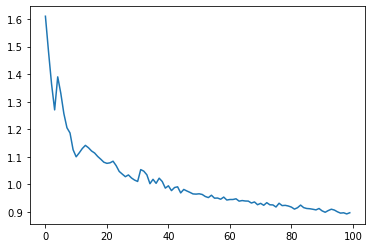

In [99]:
plt.plot(losses)
plt.show()

In [100]:
with torch.no_grad():
  model = model.to('cpu')
  y_pred = model(x_test)
  y_pred = y_pred.detach().numpy()
  predicted = np.argmax(y_pred, axis =1)
  accuracy = (accuracy_score(predicted, y_test))
  
  print(f'model의 output은 :  {y_pred[0]}')
print(f'argmax를 한 후의 output은 {predicted[0]}')
print(f'accuracy는 {accuracy}')

model의 output은 :  [ -2.7994113  -0.2383427  -1.8890114 -15.582935  -17.695993 ]
argmax를 한 후의 output은 1
accuracy는 0.5616666666666666


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
